<a href="https://colab.research.google.com/github/haru1489248/nlp-100-nock/blob/main/ch07/section_69.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 正則化パラメータの変更
（参考：https://qiita.com/c60evaporator/items/784f0640004be4eefc51））

### 正則化とは
- 過学習を防ぐために用いられる手法

### 過学習とは
- 学習データを過剰に学習し、未知データに対する予測性能が低下すること

### 正則化の仕組み
- 目的変数に寄与しない説明変数の係数を抑制することで、
  モデルの複雑さを下げ、過学習を防ぐ
- 正則化では以下の式を最小化するために学習させるようにするのでλが大きいと重みを少しでも大きくした時のペナルティが大きくなる

$$
L'(w) = L(w) + \lambda R(w)\quad (\lambda > 0)
$$

- L2正則化（一般に Ridge）
$$
\|w\|_2 = \sqrt{\sum_i w_i^2}
$$
- 実際には計算を簡単にするため、平方根を除いた形が用いられることが多い
$$
\|w\|_2^2 = \sum_i w_i^2
$$

- L1正則化（一般に Lasso）
$$
\|w\|_1 = \sum_i |w_i|
$$

### L1 / L2 正則化の使い分け（直感と利用場面）
- L2正則化（Ridge）は重み全体をなめらかに小さくする効果があり、係数が0になりにくい。  
  特徴量が多い場合や、似た特徴量（相関の強い特徴量）が複数ある場合でも学習が安定しやすいため、
  「まずは無難に性能を上げたい」「過学習を抑えつつ安定したモデルにしたい」場面でよく使われる。

- L1正則化（Lasso）は一部の係数をちょうど0にしやすく、特徴量選択（不要な特徴量を落とす）として働く。  
  そのため、説明変数が非常に多い（高次元）場合や、重要な特徴量が一部だけだと考えられる場合、
  また「モデルを解釈しやすくしたい」「使う特徴量を絞りたい」場面で有効である。

- なお、L1とL2を組み合わせたElastic Netは、L1の特徴量選択とL2の安定性の両方を狙いたいときに用いられる。

### Elastic Netとは
Elastic Net（エラスティックネット）は、L1正則化（Lasso）とL2正則化（Ridge）を両方かける正則化である。
$$
L'(w) = L(w) + \lambda(a\|w\|_1 + (1-a)\|w\|^2_2)
$$


以下に示す図は、L2正則化およびL1正則化を幾何学的に表したものである。
楕円形の曲線は損失関数の等高線を表しており、中心に近いほど損失が小さいことを示している。
一方、原点を中心とする円形（L2）および菱形（L1）は、正則化項による制約集合を表している。
損失関数の等高線を内側から広げていったときに、制約集合と最初に接する点が、
正則化付き最適化問題の解となる。

L2正則化では制約集合が滑らかな円となるため係数は0になりにくく、  
L1正則化では菱形の角に解が来やすいため一部の係数が0になりやすい

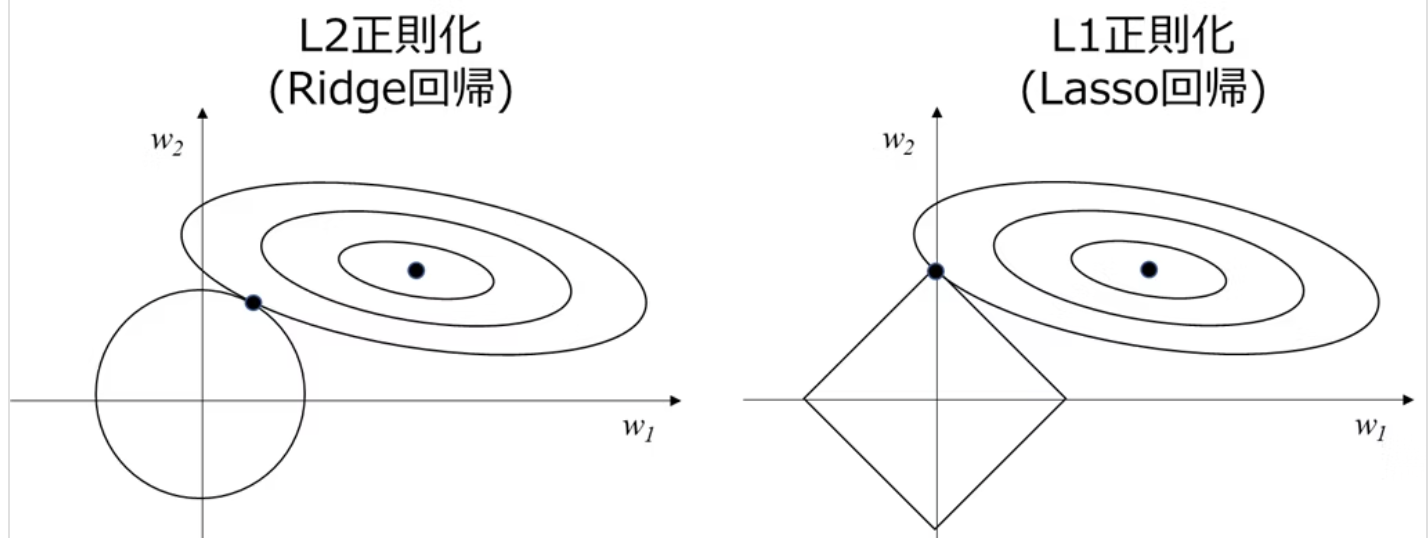

In [19]:
from PIL import Image
from IPython.display import display

img = Image.open('/content/drive/MyDrive/l1_l2_regularization.png')
display(img)

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
%run /content/drive/MyDrive/Colab\ Notebooks/section_62.ipynb

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
dev accuracy: 0.8107798165137615
predicted: 1
true: 1
correct? True
proba: [[0.00419195 0.99580805]]
[0 1]


In [16]:
import numpy as np

e-04で$$10\ ^{-4}$$と同じ意味

In [17]:
Cs = np.logspace(-4, 4, 17) # 対数的に等間隔なデータを作成する [0.0001, 10000]の範囲
print(Cs)

[1.00000000e-04 3.16227766e-04 1.00000000e-03 3.16227766e-03
 1.00000000e-02 3.16227766e-02 1.00000000e-01 3.16227766e-01
 1.00000000e+00 3.16227766e+00 1.00000000e+01 3.16227766e+01
 1.00000000e+02 3.16227766e+02 1.00000000e+03 3.16227766e+03
 1.00000000e+04]


scikit-learn の LogisticRegression では、
正則化パラメータ λ を直接指定せず、代わりに C を用いる。
C は正則化強度の逆数に相当する


In [21]:
from tqdm import tqdm # 進捗バーを表示してくれるライブラリ

In [23]:
accs = [] # accuracy score array

for C in tqdm(Cs):
  # scikit-learn 内部で行われる可能性のあるデータシャッフルの順序を固定し、
  # 実験の再現性を担保するため`random_state`を設定している
  clf = LogisticRegression(
      max_iter=1000,
      solver='liblinear',
      penalty="l2", # L2正則化を追加
      C=C,
      random_state=20260117
  )

  clf.fit(X_train, y_train)
  pred = clf.predict(X_dev)
  accs.append(accuracy_score(y_dev, pred))

100%|██████████| 17/17 [02:18<00:00,  8.12s/it]


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

Cが小さいほど正則化がつよい

In [27]:
df = pd.DataFrame({"C": Cs, "accuracy": accs})
print(df)

               C  accuracy
0       0.000100  0.527523
1       0.000316  0.639908
2       0.001000  0.684633
3       0.003162  0.709862
4       0.010000  0.755734
5       0.031623  0.794725
6       0.100000  0.800459
7       0.316228  0.806193
8       1.000000  0.810780
9       3.162278  0.821101
10     10.000000  0.824541
11     31.622777  0.809633
12    100.000000  0.794725
13    316.227766  0.786697
14   1000.000000  0.777523
15   3162.277660  0.776376
16  10000.000000  0.770642


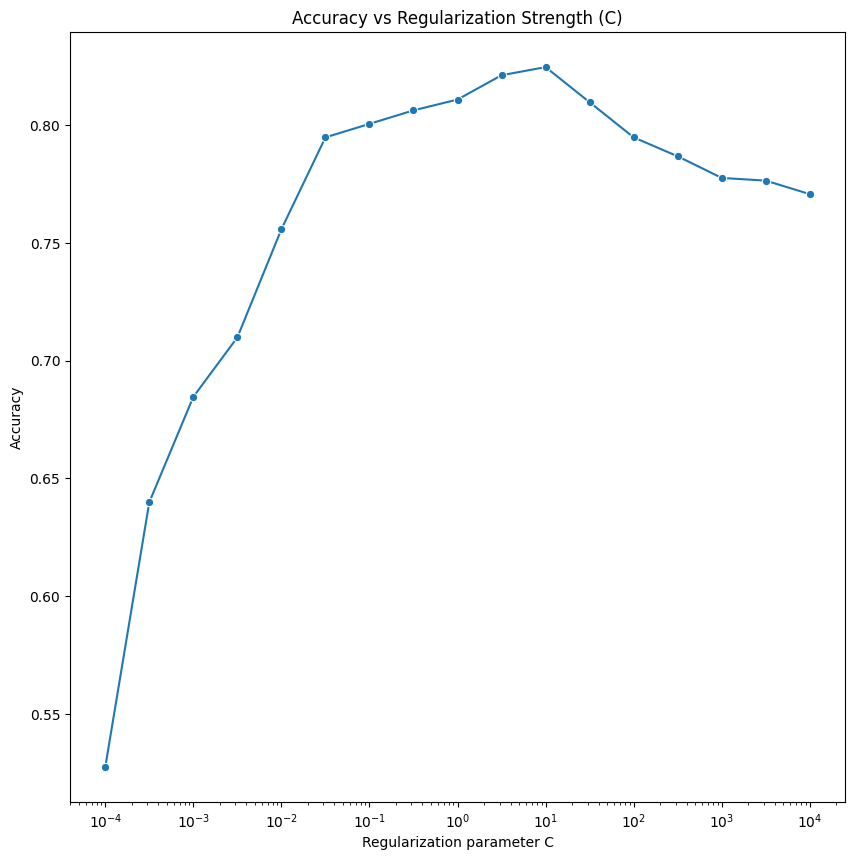

In [29]:
plt.figure(figsize=(10, 10))
sns.lineplot(data=df, x="C", y="accuracy", marker="o") # 折れ線グラフ
plt.xscale("log") # x軸を対数スケールで表示する
plt.xlabel("Regularization parameter C") # Regularization（正則化）
plt.ylabel("Accuracy")
plt.title("Accuracy vs Regularization Strength (C)")
plt.show()